In [1]:
import cv2

In [2]:
img = cv2.imread('happyboy.jpeg')

In [3]:
import matplotlib.pyplot as plt

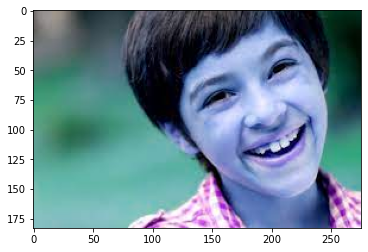

In [4]:


plt.imshow(img)

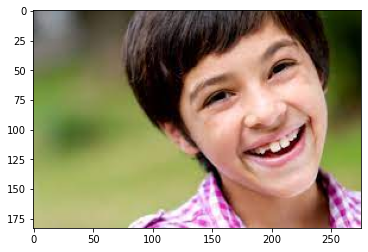

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [7]:
from deepface import DeepFace

In [8]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.02it/s]


In [9]:
predictions

[{'emotion': {'angry': 3.281465932314376e-08,
   'disgust': 8.822203542511252e-19,
   'fear': 1.72429114714788e-11,
   'happy': 99.99980926513672,
   'sad': 5.233598385397109e-11,
   'surprise': 1.1852453241090188e-05,
   'neutral': 0.00017971369743463583},
  'dominant_emotion': 'happy',
  'region': {'x': 114, 'y': 5, 'w': 149, 'h': 149},
  'age': 25,
  'gender': {'Woman': 1.1859270744025707, 'Man': 98.81407022476196},
  'dominant_gender': 'Man',
  'race': {'asian': 1.0086682625114918,
   'indian': 0.9731247089803219,
   'black': 0.039312843000516295,
   'white': 53.97781729698181,
   'middle eastern': 17.503871023654938,
   'latino hispanic': 26.4972060918808},
  'dominant_race': 'white'}]

In [10]:
predictions[0]['dominant_emotion']

'happy'

In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

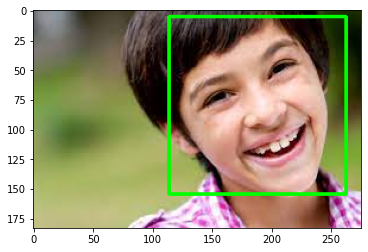

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
           predictions[0]['dominant_emotion'],
           (0,50),
           font, 1,
           (0,0,255),
           2,
           cv2.LINE_4);

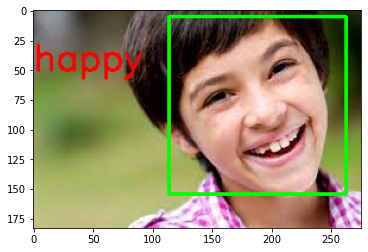

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
img = cv2.imread('fear.jpeg')

In [17]:
 predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.92it/s]


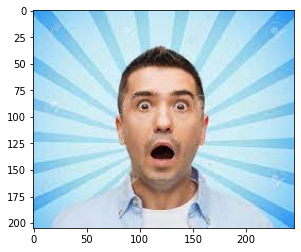

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
predictions

[{'emotion': {'angry': 3.2811865204041e-10,
   'disgust': 7.207468307714321e-18,
   'fear': 2.186534970860521e-05,
   'happy': 8.351853930665953e-10,
   'sad': 1.556001429930281e-13,
   'surprise': 99.99997615814209,
   'neutral': 5.144857584278974e-18},
  'dominant_emotion': 'surprise',
  'region': {'x': 74, 'y': 49, 'w': 96, 'h': 96},
  'age': 23,
  'gender': {'Woman': 0.06251166923902929, 'Man': 99.93749260902405},
  'dominant_gender': 'Man',
  'race': {'asian': 8.883373439311981,
   'indian': 2.8775345534086227,
   'black': 0.8340842090547085,
   'white': 23.234951496124268,
   'middle eastern': 8.052156120538712,
   'latino hispanic': 56.1178982257843},
  'dominant_race': 'latino hispanic'}]

In [20]:
pip install deepface

In [23]:
import cv2
from deepface import DeepFace
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
               result[0]['dominant_emotion'],
               (50,50),
               font,3,
               (0,0,255),
               2,
               cv2.LINE_4)
    cv2.imshow('Demo video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.71it/s]


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.